In [1]:
import numpy as np
from scipy import misc
import matplotlib.pyplot as plt
from keras.layers import Conv2D
from keras.models import Sequential
%matplotlib inline

/anaconda2/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
/anaconda2/lib/python2.7/site-packages/cryptography/hazmat/primitives/constant_time.py:26: CryptographyDeprecationWarning: Support for your Python version is deprecated. The next version of cryptography will remove support. Please upgrade to a 2.7.x release that supports hmac.compare_digest as soon as possible.
  utils.DeprecatedIn23,


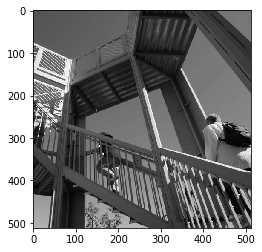

In [2]:
img = misc.ascent()
plt.imshow(img, cmap='gray')

In [4]:
img_tensor = img.reshape((1, 512, 512, 1))

In [5]:
model = Sequential()
model.add(Conv2D(1, (3, 3), strides=(2,1), input_shape=(512, 512, 1)))

# this doesnt matter, but we have to do it
model.compile('adam', 'mse')

In [6]:
img_pred_tensor = model.predict(img_tensor)

In [7]:
img_pred_tensor.shape

(1, 255, 510, 1)

In [9]:
img_pred = img_pred_tensor[0, :, :, 0]
img_pred.shape

(255, 510)

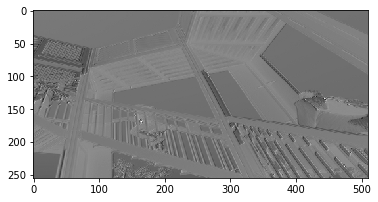

In [10]:
plt.imshow(img_pred, cmap='gray')

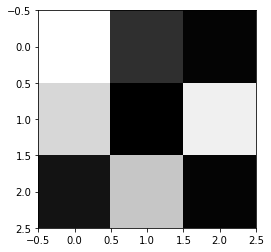

In [11]:
weights = model.get_weights()
weights[0].shape
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')

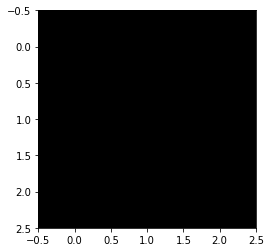

In [12]:
weights[0] = np.ones(weights[0].shape)
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')

In [13]:
model.set_weights(weights)

In [14]:
img_pred_tensor = model.predict(img_tensor)

In [15]:
img_pred = img_pred_tensor[0, :, :, 0]

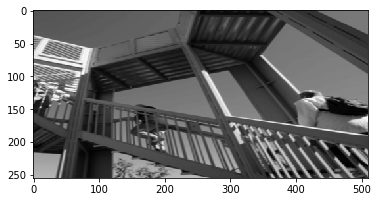

In [16]:
# slight blurr... why?
plt.imshow(img_pred, cmap='gray')

In [17]:
model = Sequential()
model.add(Conv2D(1, (3, 3), input_shape=(512, 512, 1), padding='same'))
model.compile('adam', 'mse')

img_pred_tensor = model.predict(img_tensor)


img_pred_tensor.shape

(1, 512, 512, 1)

1

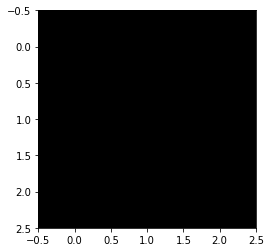

In [18]:
# re set weights
weights[0] = np.ones(weights[0].shape)
plt.imshow(weights[0][:, :, 0, 0], cmap='gray')
model.set_weights(weights)
img_pred_tensor = model.predict(img_tensor)
1

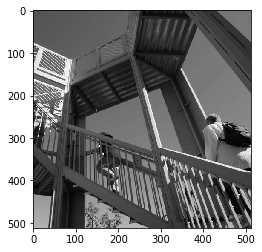

In [19]:
plt.imshow(img, cmap='gray')